In [18]:
import numpy as np 
import matplotlib.pyplot as plt 

# Multiturn

The encoder overflows at 360 degrees, but we want a continous angle signal.

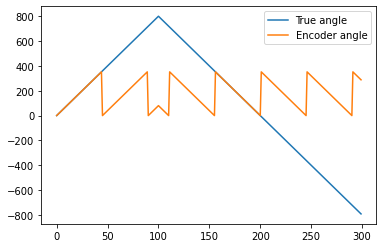

In [19]:
t = np.arange(0,300)

enc = t*8
enc[100:] = -enc[100:] + enc[100]*2

enc_y = enc - np.floor(enc/360)*360


plt.plot(enc,label='True angle')
plt.plot(enc_y,label='Encoder angle')
plt.legend()


# Idea 1

3 zones, if the middle one is skipped, we increase or decrese the turn count.

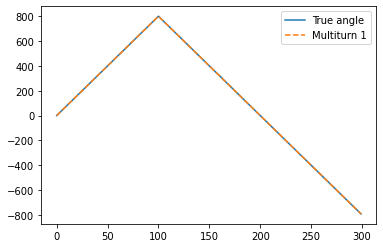

In [30]:

def multi_t_1(x):
    lap = 360#2*np.pi
    y = []

    L = 0

    for i,xi in enumerate(x):
        
        if i == 0:
            y.append(xi)
        else:

            if x[i] <= 1/3*lap and x[i-1] >= 2/3*lap:
                L += 1 
            elif x[i] >= 2/3*lap and x[i-1] <= 1/3*lap:
                L -= 1

            y.append(xi + L*lap)
    return y

ym1 = multi_t_1(enc_y)

plt.plot(enc,label='True angle')
plt.plot(ym1,'--',label='Multiturn 1')
plt.legend()


In [21]:
def speed_test(multiturn):

    V_MAX = 400
    V_STEP = 5 
    V_i = 0

    t = np.arange(0,200)

    while V_i < V_MAX:
        enc = t*V_i
        enc[100:] = -enc[100:] + enc[100]*2
        enc_y = enc - np.floor(enc/360)*360

        mt = multiturn(enc_y)
        error = enc - mt 

        peak_err = np.max(np.abs(error))
        #print('Vel',V_i)
        #print('Peak err', peak_err)

        if peak_err > 0:
            V_i -= V_STEP
            break 

        V_i += V_STEP

    print('Max deg per timestep: ', V_i)
    return V_i

speed_test(multi_t_1)


Max deg per timestep:  115


115

# Idea 2

Estimate velocity and use that for predicting if an "overflow" will occur.

***
0.0
0
0.0
***
8.0
0
8.0
***
16.0
8.0
16.0
***
24.0
8.0
24.0
***
32.0
8.0
32.0
***
40.0
8.0
40.0
***
48.0
8.0
48.0
***
56.0
8.0
56.0
***
64.0
8.0
64.0
***
72.0
8.0
72.0
***
80.0
8.0
80.0
***
88.0
8.0
88.0
***
96.0
8.0
96.0
***
104.0
8.0
104.0
***
112.0
8.0
112.0
***
120.0
8.0
120.0
***
128.0
8.0
128.0
***
136.0
8.0
136.0
***
144.0
8.0
144.0
***
152.0
8.0
152.0
***
160.0
8.0
160.0
***
168.0
8.0
168.0
***
176.0
8.0
176.0
***
184.0
8.0
184.0
***
192.0
8.0
192.0
***
200.0
8.0
200.0
***
208.0
8.0
208.0
***
216.0
8.0
216.0
***
224.0
8.0
224.0
***
232.0
8.0
232.0
***
240.0
8.0
240.0
***
248.0
8.0
248.0
***
256.0
8.0
256.0
***
264.0
8.0
264.0
***
272.0
8.0
272.0
***
280.0
8.0
280.0
***
288.0
8.0
288.0
***
296.0
8.0
296.0
***
304.0
8.0
304.0
***
312.0
8.0
312.0
***
320.0
8.0
320.0
***
328.0
8.0
328.0
***
336.0
8.0
336.0
***
344.0
8.0
344.0
***
352.0
8.0
352.0
***
0.0
8.0
0.0
***
8.0
-352.0
-352.0
***
16.0
-352.0
-704.0
***
24.0
-352.0
-1056.0
***
32.0
-352.0
-1408.0
***
0.0
0
0.0
***
0.0
0
0

0

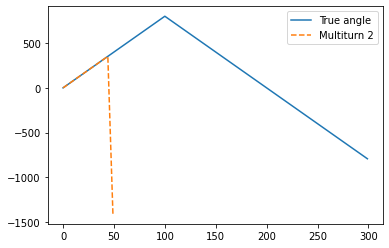

In [29]:
def multi_t_2(x):
    lap = 360#2*np.pi
    y = []
    v_est = 0
    L = 0

    for i,xi in enumerate(x):
        
        if i > 1:
            v_est = y[i-1] - y[i-2]

        if i > 1:
            y_pred = y[i-1] + v_est

            if y_pred >= (L+1)*lap:
                L += 1 
            elif y_pred < L*lap:
                L -= 1
        yi = xi + L*lap

        print('***')
        print(xi)
        print(v_est)
        print(yi)

        y.append(yi)
    return y

ym2 = multi_t_2(enc_y[0:50])

plt.plot(enc,label='True angle')
plt.plot(ym2,'--',label='Multiturn 2')
plt.legend()

speed_test(multi_t_2)